Imports

In [1]:
import random
import time

import numpy as np
import pandas as pd

import optutilities

The following code block generates data for a 10 location TSP instance and a scatterplot showing the orientation of locations.

In [2]:
tsp_data = optutilities.tsp.generate_random_tsp_data(
    n_locations=10,
    random_seed=42,
)

coordinates_df = tsp_data.get('coordinates_df')
locations = tsp_data.get('locations')
location_distances = tsp_data.get('location_distances')

The following code block plots the generated data.

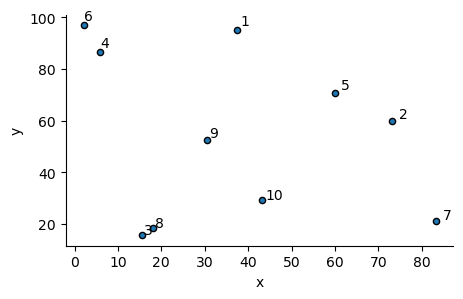

In [3]:
optutilities.tsp.generate_tsp_plot(
    coordinates_df,
    label_locations=True,
    figsize_tuple=(5, 3)
)

The following code block defines and plots a feasible starting solution.

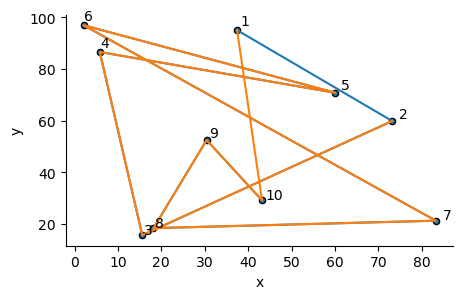

In [4]:
tour = list(locations)

optutilities.tsp.generate_tsp_plot(
    coordinates_df,
    tour_list=tour,
    label_locations=True,
    figsize_tuple=(5, 3)
)

#### Neighborhood Search

The following code block defines a function that performs an adjacent pairwise interchange on an input solution.

In [5]:
def apply_adjacent_pairwise_interchange(
    input_list: list,
) -> list:
    import numpy as np

    a = np.random.randint(0, len(input_list) - 1)

    mutated = list(input_list)
    mutated[a], mutated[a + 1] = mutated[a + 1], mutated[a]

    return mutated

The following code block demonstrates the function.

In [6]:
print(f'Original:    {tour}')
np.random.seed(0)
for i in range(1, 10):
    neighbor = apply_adjacent_pairwise_interchange(tour)
    print(f'Neighbor {i:>2}: {neighbor}')

Original:    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Neighbor  1: [1, 2, 3, 4, 5, 7, 6, 8, 9, 10]
Neighbor  2: [2, 1, 3, 4, 5, 6, 7, 8, 9, 10]
Neighbor  3: [1, 2, 3, 5, 4, 6, 7, 8, 9, 10]
Neighbor  4: [1, 2, 3, 5, 4, 6, 7, 8, 9, 10]
Neighbor  5: [1, 2, 3, 4, 5, 6, 7, 9, 8, 10]
Neighbor  6: [1, 2, 3, 5, 4, 6, 7, 8, 9, 10]
Neighbor  7: [1, 2, 3, 4, 5, 7, 6, 8, 9, 10]
Neighbor  8: [1, 2, 4, 3, 5, 6, 7, 8, 9, 10]
Neighbor  9: [1, 2, 3, 4, 6, 5, 7, 8, 9, 10]


The following code block defines a function that performs a pairwise interchange on an input solution.

In [7]:
def apply_pairwise_interchange(
    input_list: list,
) -> list:
    import numpy as np

    a, b = np.random.choice(
        range(0, len(input_list)),
        size=2,
        replace=False,
    )
    a, b = sorted([a, b])

    mutated = list(input_list)
    mutated[a], mutated[b] = mutated[b], mutated[a]

    return mutated

The following code block demonstrates the function.

In [8]:
print(f'Original:    {tour}')
np.random.seed(0)
for i in range(1, 11):
    neighbor = apply_pairwise_interchange(tour)
    print(f'Neighbor {i:>2}: {neighbor}')

Original:    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Neighbor  1: [1, 2, 9, 4, 5, 6, 7, 8, 3, 10]
Neighbor  2: [1, 2, 3, 6, 5, 4, 7, 8, 9, 10]
Neighbor  3: [1, 2, 4, 3, 5, 6, 7, 8, 9, 10]
Neighbor  4: [1, 7, 3, 4, 5, 6, 2, 8, 9, 10]
Neighbor  5: [1, 2, 6, 4, 5, 3, 7, 8, 9, 10]
Neighbor  6: [1, 9, 3, 4, 5, 6, 7, 8, 2, 10]
Neighbor  7: [1, 2, 4, 3, 5, 6, 7, 8, 9, 10]
Neighbor  8: [10, 2, 3, 4, 5, 6, 7, 8, 9, 1]
Neighbor  9: [1, 2, 3, 4, 5, 6, 7, 9, 8, 10]
Neighbor 10: [1, 3, 2, 4, 5, 6, 7, 8, 9, 10]


The following code block defines a function that performs a sub-sequence reversal on an input solution.

In [9]:
def apply_subsequence_reversal(
    input_list: list,
) -> list:
    import numpy as np

    a, b = np.random.choice(
        range(0, len(input_list) + 1),
        size=2,
        replace=False,
    )
    a, b = sorted([a, b])

    mutated = list(input_list)
    mutated[a:b] = mutated[a:b][::-1]

    return mutated

The following code block demonstrates the function.

In [10]:
print(f'Original:    {tour}')
np.random.seed(0)
for i in range(1, 10):
    neighbor = apply_subsequence_reversal(tour)
    print(f'Neighbor {i:>2}: {neighbor}')

Original:    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Neighbor  1: [1, 2, 3, 4, 9, 8, 7, 6, 5, 10]
Neighbor  2: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Neighbor  3: [1, 2, 6, 5, 4, 3, 7, 8, 9, 10]
Neighbor  4: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Neighbor  5: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Neighbor  6: [1, 2, 3, 10, 9, 8, 7, 6, 5, 4]
Neighbor  7: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Neighbor  8: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Neighbor  9: [1, 8, 7, 6, 5, 4, 3, 2, 9, 10]


The following code block defines a function to compute the distance of a tour.

In [11]:
def get_tour_distance(
    tour_list: list,
    distance_dict: dict,
) -> float:

    distance = 0
    for stop_idx, stop in enumerate(tour_list[:-1]):
        distance += distance_dict[stop, tour_list[stop_idx+1]]
    distance += distance_dict[tour_list[-1], tour_list[0]]

    return distance

The following code block defines a function we will use to plot the progress of our neighborhood search procedure.

In [12]:
def get_improvement_plot(
    progress_dict: dict,
    figsize_tuple: tuple = (6, 4),
    logx: bool = True,
    title: str = '',
) -> None:

    import matplotlib.pyplot as plt
    import pandas as pd

    fig, ax = plt.subplots(1, 1, figsize=figsize_tuple)

    pd.DataFrame.from_dict(
        progress_dict,
        orient='index',
        columns=['value']
    ).reset_index().rename(
        columns={'index': 'iteration'}
    ).plot(
        x='iteration',
        y='value',
        logx=logx,
        ax=ax,
        legend=False,
    )

    ax.spines[['right', 'top']].set_visible(False)
    ax.axhline(
        min(progress_dict.values()),
        color='k',
        linestyle='--',
    )

    if title:
        ax.set_title(title)

The following code block solves the TSP instance using Gurobi to get the optimal solution. **Note: You will need to have Gurobi installed and an active license to run this cell. If you don't have Gurobi installed, skip this cell.**

In [13]:
tsp_solve_data = optutilities.tsp.solve_tsp(
    locations=locations,
    distance_dict=location_distances,
)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-30
Set parameter TimeLimit to value 60
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Pop!_OS 22.04 LTS")

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 100 columns and 190 nonzeros
Model fingerprint: 0xe1b4602c
Variable types: 0 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 545.5926273
Presolve removed 10 rows and 10 columns
Presolve time: 0.00s
Presolved: 20 rows, 90 columns, 180 nonzeros
Variable types: 0 continuous, 90 integer (90 binary)

Root relaxation: objective 2.290519e+02, 14 iterations, 0.00 seconds (0.00

The following code block plots the solution. **Note: This depends on the output of the previous cell. If you don't have Gurobi installed, skip this cell.**

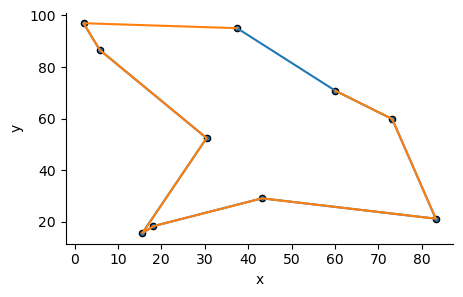

In [14]:
X = tsp_solve_data.get('X')

solution_tour = optutilities.tsp.convert_tsp_X_to_tour(
    locations=locations,
    X=X,
)

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    tour_list=solution_tour,
    label_locations=False,
    figsize_tuple=(5, 3)
)

The following code block specifies a neighborhood search procedure.

 - 290.307


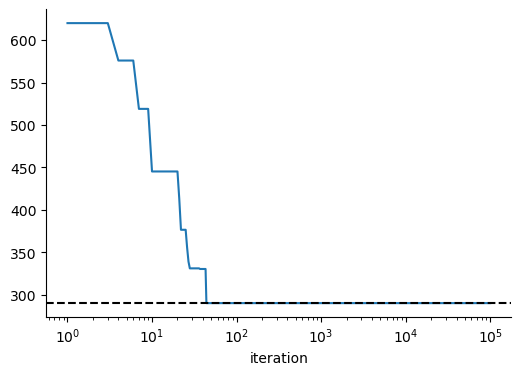

In [15]:
max_non_improving_iterations = 100000
max_time = 60
start_time = time.time()

mutation_function = apply_subsequence_reversal

incumbent = list(locations)
incumbent_fitness = get_tour_distance(
    tour_list=incumbent,
    distance_dict=location_distances,
)

counter = 1
incumbent_progress = {}
incumbent_progress[counter] = incumbent_fitness

non_improving_iterations = 0
while non_improving_iterations < max_non_improving_iterations:
    counter += 1

    neighbor = mutation_function(incumbent)
    neighbor_fitness = get_tour_distance(
        tour_list=neighbor,
        distance_dict=location_distances,
    )
    if neighbor_fitness < incumbent_fitness:
        incumbent = list(neighbor)
        incumbent_fitness = neighbor_fitness
        non_improving_iterations = 0
    else:
        non_improving_iterations += 1
    incumbent_progress[counter] = incumbent_fitness

    if time.time() - start_time > max_time:
        non_improving_iterations = np.inf

get_improvement_plot(incumbent_progress)
print(f' - {incumbent_fitness:.3f}')

#### k-opt Neighborhood Structures

The following code block generates a small TSP example for demonstration purposes.

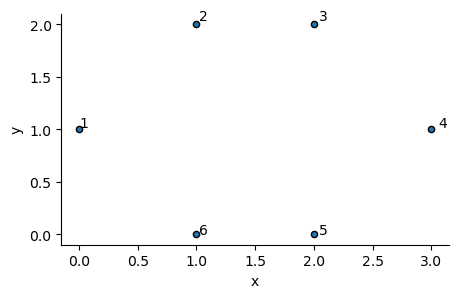

In [16]:
tsp_demo_data = optutilities.tsp.generate_demo_tsp_data()

coordinates_df = tsp_demo_data.get('coordinates_df')
locations = tsp_demo_data.get('locations')
location_distances = tsp_demo_data.get('location_distances')

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    label_locations=True,
    figsize_tuple=(5, 3),
)

The following code block defines a tour.

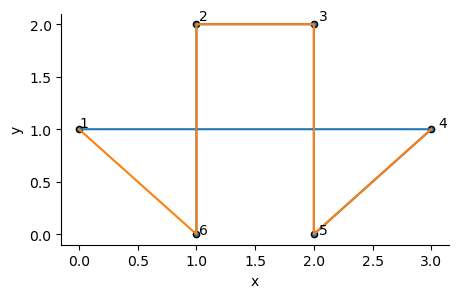

In [17]:
tour = [1, 4, 5, 3, 2, 6]

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    label_locations=True,
    tour_list=tour,
    figsize_tuple=(5, 3),
)

The following code block defines possible cases for 2-opt and 3-opt moves based on selecting 3 edges in the original tour.

In [18]:
a, c, e = 0, 2, 4
b, d, f = a + 1, c + 1, e + 1

mutated = list(tour)
cases = {
    'identity': mutated[:a+1] + mutated[b:c+1] + mutated[d:e+1] + mutated[f:],
    '2-opt-1': mutated[:a+1] + mutated[b:c+1] + mutated[e:d-1:-1] + mutated[f:],
    '2-opt-2': mutated[:a+1] + mutated[c:b-1:-1] + mutated[d:e+1] + mutated[f:],
    '3-opt-1': mutated[:a+1] + mutated[c:b-1:-1] + mutated[e:d-1:-1] + mutated[f:],
    '3-opt-2': mutated[:a+1] + mutated[d:e+1] + mutated[b:c+1] + mutated[f:],
    '3-opt-3': mutated[:a+1] + mutated[d:e+1] + mutated[c:b-1:-1] + mutated[f:],
    '3-opt-4': mutated[:a+1] + mutated[e:d-1:-1] + mutated[b:c+1] + mutated[f:],
    '2-opt-3': mutated[:a+1] + mutated[e:d-1:-1] + mutated[c:b-1:-1] + mutated[f:],
}

The following code block allows you to plot the original tour along with specific cases of the 2-opt and 3-opt moves.

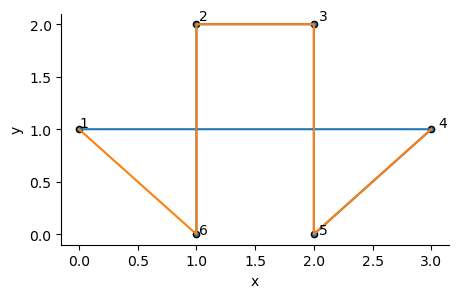

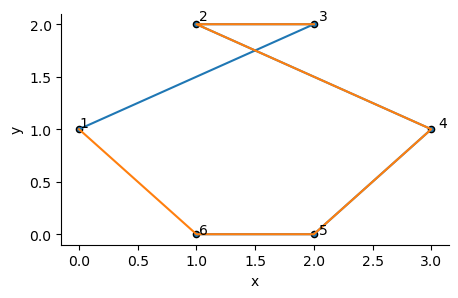

In [19]:
tour = [1, 4, 5, 3, 2, 6]

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    label_locations=True,
    tour_list=tour,
    figsize_tuple=(5, 3),
)

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    label_locations=True,
    tour_list=cases['3-opt-2'],
    figsize_tuple=(5, 3),
)

The following code block defines a function that can be used to construct a neighbor solution based on the 2-opt and 3-opt moves.

In [20]:
def apply_three_opt(
    input_list: list,
):
    """
    This function is adapted from that found at:
    https://stackoverflow.com/questions/21205261/3-opt-local-search-for-tsp
    
    Original description: In the broad sense, 3-opt means choosing any three 
    edges ab, cd and ef and chopping them, and then reconnecting (such that the
    result is still a complete tour). There are eight ways of doing
    it. One is the identity, 3 are 2-opt moves (because either ab, cd,
    or ef is reconnected), and 4 are 3-opt moves (in the narrower
    sense).
    """
    import random

    n = len(input_list)
    mutated = list(input_list)

    # choose 3 unique edges defined by their first node
    a, c, e = random.sample(range(n+1), 3)

    # without loss of generality, sort
    a, c, e = sorted([a, c, e])
    b, d, f = a+1, c+1, e+1

    # in the following slices, the nodes abcdef are referred to by
    # name. x:y:-1 means step backwards. anything like c+1 or d-1
    # refers to c or d, but to include the item itself, we use the +1
    # or -1 in the slice
    cases = {
        'identity': mutated[:a+1] + mutated[b:c+1] + mutated[d:e+1] + mutated[f:],
        '2-opt-1': mutated[:a+1] + mutated[b:c+1] + mutated[e:d-1:-1] + mutated[f:],
        '2-opt-2': mutated[:a+1] + mutated[c:b-1:-1] + mutated[d:e+1] + mutated[f:],
        '3-opt-1': mutated[:a+1] + mutated[c:b-1:-1] + mutated[e:d-1:-1] + mutated[f:],
        '3-opt-2': mutated[:a+1] + mutated[d:e+1] + mutated[b:c+1] + mutated[f:],
        '3-opt-3': mutated[:a+1] + mutated[d:e+1] + mutated[c:b-1:-1] + mutated[f:],
        '3-opt-4': mutated[:a+1] + mutated[e:d-1:-1] + mutated[b:c+1] + mutated[f:],
        '2-opt-3': mutated[:a+1] + mutated[e:d-1:-1] + mutated[c:b-1:-1] + mutated[f:],
    }
    
    case = random.choice(list(cases.keys()))

    return cases[case]

For testing purposes, we will use a 50-location TSP instance. The following code block generates the data.

In [21]:
tsp_data = optutilities.tsp.generate_random_tsp_data(
    n_locations=50,
    random_seed=42,
)

coordinates_df = tsp_data.get('coordinates_df')
locations = tsp_data.get('locations')
location_distances = tsp_data.get('location_distances')

The following code block solves the instance using Gurobi. **Note: You will need to have Gurobi installed and an active license to run this cell. If you don't have Gurobi installed, skip this cell.**

In [22]:
tsp_solve_data = optutilities.tsp.solve_tsp(
    locations=locations,
    distance_dict=location_distances,
)

Set parameter TimeLimit to value 60
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Pop!_OS 22.04 LTS")

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 150 rows, 2500 columns and 4950 nonzeros
Model fingerprint: 0xaeb3523f
Variable types: 0 continuous, 2500 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-07, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 2922.7442354
Presolve removed 50 rows and 50 columns
Presolve time: 0.01s
Presolved: 100 rows, 2450 columns, 4900 nonzeros
Variable types: 0 continuous, 2450 integer (2450 binary)

Root relaxation: objective 4.565934e+02, 86 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |

The following code block applies the new neighborhood structure in our neighborhood search procedure.

 - 572.304


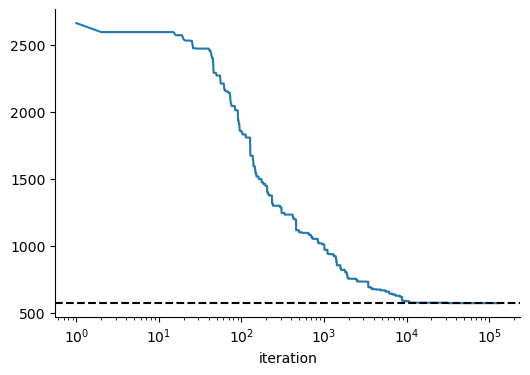

In [23]:
max_non_improving_iterations = 100000
max_time = 60
start_time = time.time()

mutation_function = apply_three_opt

incumbent = list(locations)
incumbent_fitness = get_tour_distance(
    tour_list=incumbent,
    distance_dict=location_distances,
)

counter = 1
incumbent_progress = {}
incumbent_progress[counter] = incumbent_fitness

non_improving_iterations = 0
while non_improving_iterations < max_non_improving_iterations:
    counter += 1

    neighbor = mutation_function(incumbent)
    neighbor_fitness = get_tour_distance(
        tour_list=neighbor,
        distance_dict=location_distances,
    )
    if neighbor_fitness < incumbent_fitness:
        incumbent = list(neighbor)
        incumbent_fitness = neighbor_fitness
        non_improving_iterations = 0
    else:
        non_improving_iterations += 1
    incumbent_progress[counter] = incumbent_fitness

    if time.time() - start_time > max_time:
        non_improving_iterations = np.inf

get_improvement_plot(incumbent_progress)
print(f' - {incumbent_fitness:.3f}')

The following code block plots the solution found by the neighborhood search procedure.

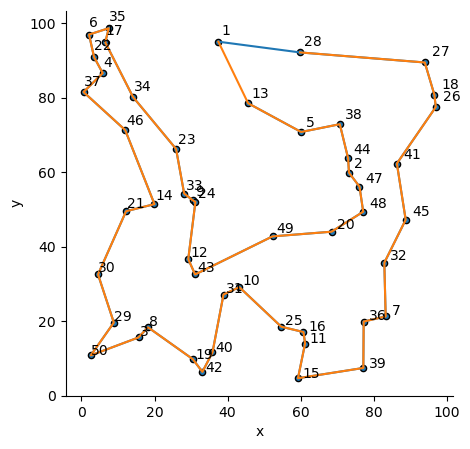

In [24]:
optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    tour_list=incumbent,
)

#### End-to-end example using optutilities

The following code block demonstrates the end-to-end process using the `optutilities` package and the sub-sequence reversal neighborhood structure to solve a 25-location TSP instance. **Note: You will need to have Gurobi installed and an active license to run this cell. If you don't have Gurobi installed, skip this cell.**

 - Generating data
 - Solving with Gurobi
Set parameter TimeLimit to value 60
 - Distance for tour from Gurobi: 407.308


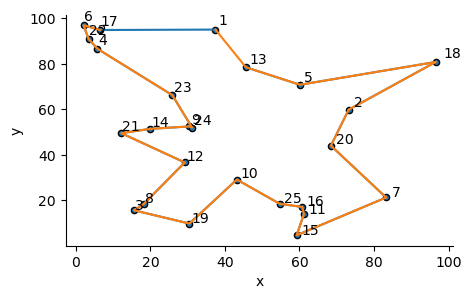

 - Performing neighborhood search
 - Distance for tour from neighborhood search: 477.976


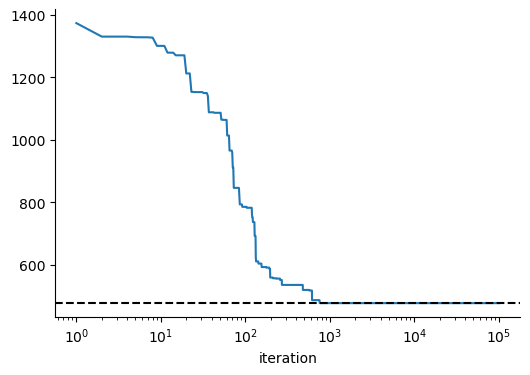

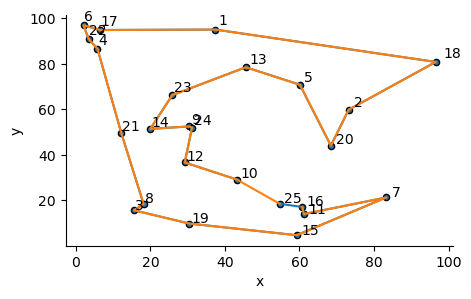

In [25]:
print(' - Generating data')
tsp_data = optutilities.tsp.generate_random_tsp_data(
    n_locations=25,
    random_seed=42,
)

coordinates_df = tsp_data.get('coordinates_df')
locations = tsp_data.get('locations')
location_distances = tsp_data.get('location_distances')

print(' - Solving with Gurobi')
tsp_solve_data = optutilities.tsp.solve_tsp(
    locations=locations,
    distance_dict=location_distances,
    verbose=False,
)

X = tsp_solve_data.get('X')

solution_tour = optutilities.tsp.convert_tsp_X_to_tour(
    locations=locations,
    X=X,
)
solution_distance = get_tour_distance(
    tour_list=solution_tour,
    distance_dict=location_distances,
)
print(f' - Distance for tour from Gurobi: {solution_distance:.3f}')

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    tour_list=solution_tour,
    label_locations=True,
    figsize_tuple=(5, 3)
)

print(' - Performing neighborhood search')
max_non_improving_iterations = 100000
max_time = 60
start_time = time.time()

mutation_function = optutilities.improvement.apply_subsequence_reversal

incumbent = list(locations)
incumbent_fitness = get_tour_distance(
    tour_list=incumbent,
    distance_dict=location_distances,
)

counter = 1
incumbent_progress = {}
incumbent_progress[counter] = incumbent_fitness

non_improving_iterations = 0
while non_improving_iterations < max_non_improving_iterations:
    counter += 1

    neighbor = mutation_function(incumbent)
    neighbor_fitness = get_tour_distance(
        tour_list=neighbor,
        distance_dict=location_distances,
    )
    if neighbor_fitness < incumbent_fitness:
        incumbent = list(neighbor)
        incumbent_fitness = neighbor_fitness
        non_improving_iterations = 0
    else:
        non_improving_iterations += 1
    incumbent_progress[counter] = incumbent_fitness

    if time.time() - start_time > max_time:
        non_improving_iterations = np.inf

get_improvement_plot(incumbent_progress)
print(f' - Distance for tour from neighborhood search: {incumbent_fitness:.3f}')

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    tour_list=incumbent,
    label_locations=True,
    figsize_tuple=(5, 3)
)

The following code block demonstrates the end-to-end process using the `optutilities` package and the 3-opt neighborhood structure to solve a 25-location TSP instance. **Note: You will need to have Gurobi installed and an active license to run this cell. If you don't have Gurobi installed, skip this cell.**

 - Generating data
 - Solving with Gurobi
Set parameter TimeLimit to value 60
 - Distance for tour from Gurobi: 407.308


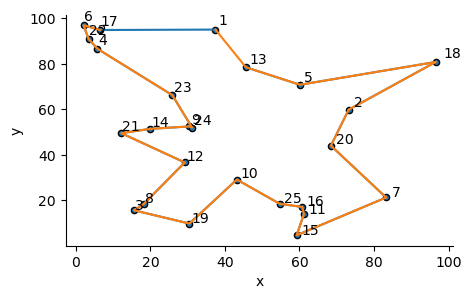

 - Performing neighborhood search
 - Distance for tour from neighborhood search: 407.308


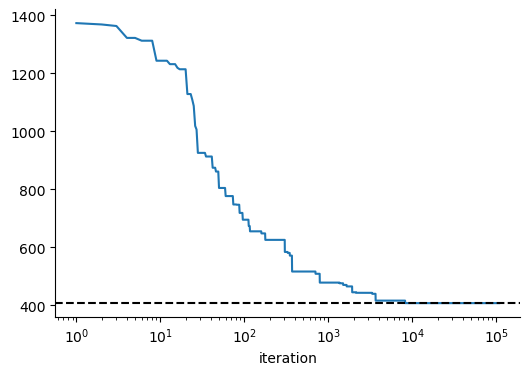

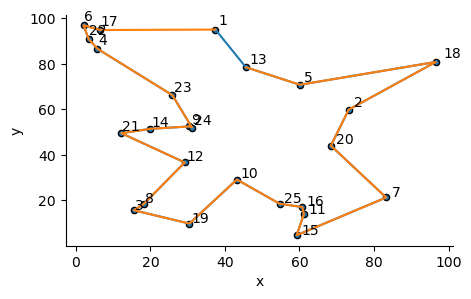

In [26]:
print(' - Generating data')
tsp_data = optutilities.tsp.generate_random_tsp_data(
    n_locations=25,
    random_seed=42,
)

coordinates_df = tsp_data.get('coordinates_df')
locations = tsp_data.get('locations')
location_distances = tsp_data.get('location_distances')

print(' - Solving with Gurobi')
tsp_solve_data = optutilities.tsp.solve_tsp(
    locations=locations,
    distance_dict=location_distances,
    verbose=False,
)

X = tsp_solve_data.get('X')

solution_tour = optutilities.tsp.convert_tsp_X_to_tour(
    locations=locations,
    X=X,
)
solution_distance = get_tour_distance(
    tour_list=solution_tour,
    distance_dict=location_distances,
)
print(f' - Distance for tour from Gurobi: {solution_distance:.3f}')

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    tour_list=solution_tour,
    label_locations=True,
    figsize_tuple=(5, 3)
)

print(' - Performing neighborhood search')
max_non_improving_iterations = 100000
max_time = 60
start_time = time.time()

mutation_function = optutilities.improvement.apply_three_opt

incumbent = list(locations)
incumbent_fitness = get_tour_distance(
    tour_list=incumbent,
    distance_dict=location_distances,
)

counter = 1
incumbent_progress = {}
incumbent_progress[counter] = incumbent_fitness

non_improving_iterations = 0
while non_improving_iterations < max_non_improving_iterations:
    counter += 1

    neighbor = mutation_function(incumbent)
    neighbor_fitness = get_tour_distance(
        tour_list=neighbor,
        distance_dict=location_distances,
    )
    if neighbor_fitness < incumbent_fitness:
        incumbent = list(neighbor)
        incumbent_fitness = neighbor_fitness
        non_improving_iterations = 0
    else:
        non_improving_iterations += 1
    incumbent_progress[counter] = incumbent_fitness

    if time.time() - start_time > max_time:
        non_improving_iterations = np.inf

get_improvement_plot(incumbent_progress)
print(f' - Distance for tour from neighborhood search: {incumbent_fitness:.3f}')

optutilities.tsp.generate_tsp_plot(
    coordinates_df=coordinates_df,
    tour_list=incumbent,
    label_locations=True,
    figsize_tuple=(5, 3)
)